In [1]:
# Import required libraries and dependencies
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
market_data_df.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

In [5]:
market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [6]:
market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_df_scaled = StandardScaler().fit_transform(market_data_df[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", 
                                                             "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])

market_data_df_scaled

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [8]:
# Create a DataFrame with the scaled data
market_transformed_df = pd.DataFrame(market_data_df_scaled, columns=["price_change_percentage_24h", "price_change_percentage_7d", 
                                                                     "price_change_percentage_14d", "price_change_percentage_30d", 
                                                                    "price_change_percentage_60d", "price_change_percentage_200d", 
                                                                     "price_change_percentage_1y"])

# Copy the crypto names from the original data
market_transformed_df["coin_id"] = market_data_df.index

# Set the coinid column as index
market_transformed_df.set_index("coin_id", inplace=True)

# Display sample data
print(market_transformed_df)


                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                  0.508529                    0.493193   
ethereum                                 0.185446                    0.934445   
tether                                   0.021774                   -0.706337   
ripple                                  -0.040764                   -0.810928   
bitcoin-cash                             1.193036                    2.000959   
binancecoin                              0.891871                    1.327295   
chainlink                                0.011397                    2.572251   
cardano                                  0.102530                    1.508001   
litecoin                                 0.077497                    0.334297   
bitcoin-cash-sv                          0.448952                   -0.190684   
crypto-com-chain            

### Find the Best Value for k Using the Original Scaled DataFrame.

In [9]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(market_transformed_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

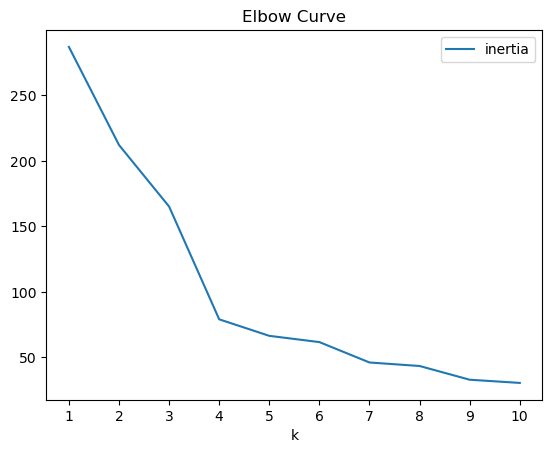

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4?

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [11]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=2, n_init="auto", random_state=1)

In [12]:
# Fit the K-Means model using the scaled data
model.fit(market_transformed_df)

KMeans(n_clusters=2, n_init='auto', random_state=1)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_lower = model.predict(market_transformed_df)

# View the resulting array of cluster values.
print(k_lower)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0]


In [14]:
k_lower.shape

(41,)

In [15]:
market_transformed_df.shape

(41, 7)

In [16]:
#k_lower_reshaped = k_lower[:, np.newaxis]

#print(k_lower_reshaped.shape)

In [17]:
#k_lower_newaxis = k_lower_reshaped.reshape(-1,1)

#k_lower_newaxis.shape

In [18]:
#k_lower_newaxis2 = k_lower_newaxis.reshape(-1,7)

In [19]:
# Create a copy of the DataFrame
market_scaled_predictions = market_transformed_df.copy()

In [20]:
market_transformed_df.shape

(41, 7)

In [21]:
# Add a new column to the DataFrame with the predicted clusters
market_scaled_predictions["predicted_clusters"] = k_lower

# Display sample data
market_scaled_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

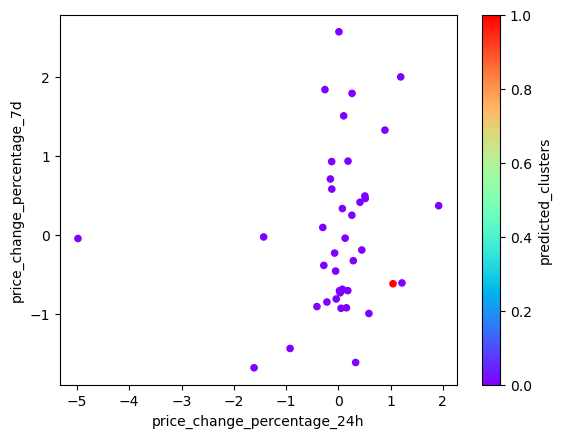

In [22]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_scaled_predictions.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_clusters",
    colormap="rainbow")

### Optimize Clusters with Principal Component Analysis.

In [23]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [24]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_info_pca = pca.fit_transform(market_scaled_predictions)

# View the first five rows of the DataFrame. 
market_info_pca[:5]

array([[-0.56436823,  0.86541024,  0.46468776],
       [-0.4399645 ,  0.47435897,  0.95403011],
       [-0.43964632, -0.1471916 , -0.64258317],
       [-0.48091135, -0.20003147, -0.4805896 ],
       [-1.07007299,  2.08247796,  1.86621559]])

In [25]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.37152491, 0.34738576, 0.17571057])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [26]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_info_pca_df = pd.DataFrame(market_info_pca)

# Copy the crypto names from the original data
market_info_pca_df["coin_id"] = market_data_df.index

# Set the coinid column as index

market_info_pca_df.set_index("coin_id", inplace=True)

# Display sample data
market_info_pca_df.head()

,0,1,2
coin_id,,,
bitcoin,-0.564368,0.865410,0.464688
ethereum,-0.439964,0.474359,0.954030
tether,-0.439646,-0.147192,-0.642583
ripple,-0.480911,-0.200031,-0.480590
bitcoin-cash,-1.070073,2.082478,1.866216


### Find the Best Value for k Using the PCA Data

In [27]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    pca_k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    pca_k_model.fit(market_info_pca_df)
    inertia.append(pca_k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {"k": k, "inertia": inertia}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow_pca


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

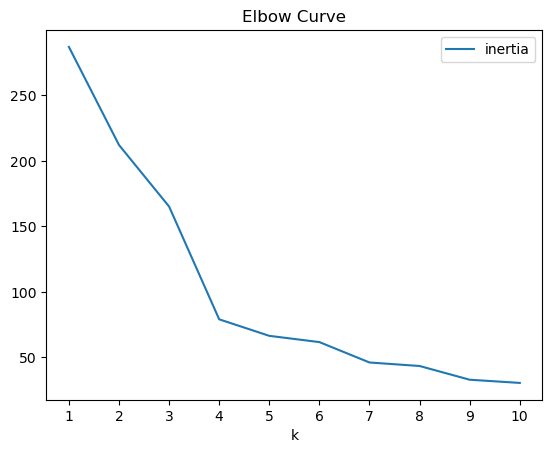

In [28]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [29]:
# Initialize the K-Means model using the best value for k
pca_model = KMeans(n_clusters=2, n_init="auto", random_state=1)

In [30]:
# Fit the K-Means model using the PCA data
pca_model.fit(market_info_pca_df)

KMeans(n_clusters=2, n_init='auto', random_state=1)

In [31]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_pca_predictions = pca_model.predict(market_info_pca_df)

# Print the resulting array of cluster values.
print(cluster_pca_predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0]


In [32]:
# Create a copy of the DataFrame with the PCA data
cluster_pca_predictions_df = cluster_pca_predictions.copy()

# Add a new column to the DataFrame with the predicted clusters
cluster_pca_predictions_df["predicted clusters"] = cluster_pca_predictions

# Display sample data
cluster_pca_predictions_df

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
cluster_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="predicted clusters",
    colormap="rainbow")

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

### Determine the Weights of Each Feature on each Principal Component

In [33]:
# Use the columns from the original scaled DataFrame as the index.
cluster_pca_predictions_df.set_index

AttributeError: 'numpy.ndarray' object has no attribute 'set_index'

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    